In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import logging
import os


In [14]:
# Logging
os.makedirs("logs", exist_ok=True)

logger = logging.getLogger("movie_pipeline")
logger.setLevel(logging.INFO)
logger.handlers.clear()

handler = logging.FileHandler("logs/pipeline.log", encoding="utf-8")
formatter = logging.Formatter("%(asctime)s | %(levelname)s | %(message)s")
handler.setFormatter(formatter)

logger.addHandler(handler)
logger.propagate = False

logger.info("Notebook pipeline started")


In [15]:
raw_df = pd.read_json("movies_raw.json")

logger.info(f"Extracted raw data | rows={raw_df.shape[0]} cols={raw_df.shape[1]}")
raw_df.head()


,movie_id,title,tagline,overview,poster_path,release_date,runtime,budget,revenue,popularity,vote_average,vote_count,original_language,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,credits
0,299534,Avengers: Endgame,Avenge the fallen.,After the devastating events of Avengers: Infi...,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,2019-04-24,181,356000000,2799439100,18.7803,8.237,27112,en,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,19995,Avatar,Enter the world of Pandora.,"In the 22nd century, a paraplegic Marine is di...",/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,2009-12-16,162,237000000,2923706026,78.4923,7.600,33222,en,"{'id': 87096, 'name': 'Avatar Collection', 'po...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 444, 'logo_path': None, 'name': 'Dune ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,140607,Star Wars: The Force Awakens,Every generation has a story.,Thirty years after defeating the Galactic Empi...,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,2015-12-15,136,245000000,2068223624,9.7421,7.300,20187,en,"{'id': 10, 'name': 'Star Wars Collection', 'po...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,299536,Avengers: Infinity War,Destiny arrives all the same.,As the Avengers and their allies have continue...,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,149,300000000,2052415039,29.1609,8.236,31326,en,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,597,Titanic,Nothing on earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,1997-12-18,194,200000000,2264162353,35.7108,7.902,26647,en,None,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...","[{'id': 4, 'logo_path': '/jay6WcMgagAklUt7i9Eu...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [16]:
transformed_df = pd.read_csv("movies_transformed.csv")

transformed_df.head()


,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,budget_musd_num,revenue_musd_num,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
0,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,$356.0M,$2799.4M,356.0,2799.439100,...,8.237,18.7803,181,After the devastating events of Avengers: Infi...,English|日本語|,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,107,Anthony Russo,608
1,Avatar,Enter the world of Pandora.,2009-12-16,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,$237.0M,$2923.7M,237.0,2923.706026,...,7.600,78.4923,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,67,James Cameron,991
2,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,$245.0M,$2068.2M,245.0,2068.223624,...,7.300,9.7421,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,264
3,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,$300.0M,$2052.4M,300.0,2052.415039,...,8.236,29.1609,149,As the Avengers and their allies have continue...,English|,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo,734
4,Titanic,Nothing on earth could come between them.,1997-12-18,Drama|Romance,NaN,en,$200.0M,$2264.2M,200.0,2264.162353,...,7.902,35.7108,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262


In [17]:

from KPI.kpis import get_movie_kpi,compute_all_kpis

kpi_results = compute_all_kpis(transformed_df)
kpi_results.head()

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\ZainabAbdullai\AppData\Local\Programs\Python\Python310\lib\logging\__init__.py", line 1103, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\ZainabAbdullai\AppData\Local\Programs\Python\Python310\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u2265' in position 81: character maps to <undefined>
Call stack:
  File "C:\Users\ZainabAbdullai\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\ZainabAbdullai\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\ZainabAbdullai\Desktop\TMDB\TMDB_Movie_Analysis\venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File

,KPI,Movie,Value
0,Highest Revenue,Avatar,2923.706026
1,Highest Budget,Avengers: Endgame,356.000000
2,Highest Profit,Avatar,2686.706026
3,Lowest Profit,Star Wars: The Last Jedi,1032.698830
4,Highest ROI (Budget ≥10M),Avatar,11.336312


In [18]:
get_movie_kpi(transformed_df, "Highest Revenue")


,KPI,Movie,Value
0,Highest Revenue,Avatar,2923.706026


In [19]:
from Visualization.visualize import prepare_analytics, run_all_visualizations

In [20]:
df_test = prepare_analytics(transformed_df)
print(df_test.columns)




Index(['title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
       'original_language', 'budget_musd', 'revenue_musd', 'budget_musd_num',
       'revenue_musd_num', 'profit_musd', 'roi', 'production_companies',
       'production_countries', 'vote_count', 'vote_average', 'popularity',
       'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast',
       'cast_size', 'director', 'crew_size', 'release_year', 'primary_genre',
       'movie_type'],
      dtype='object')


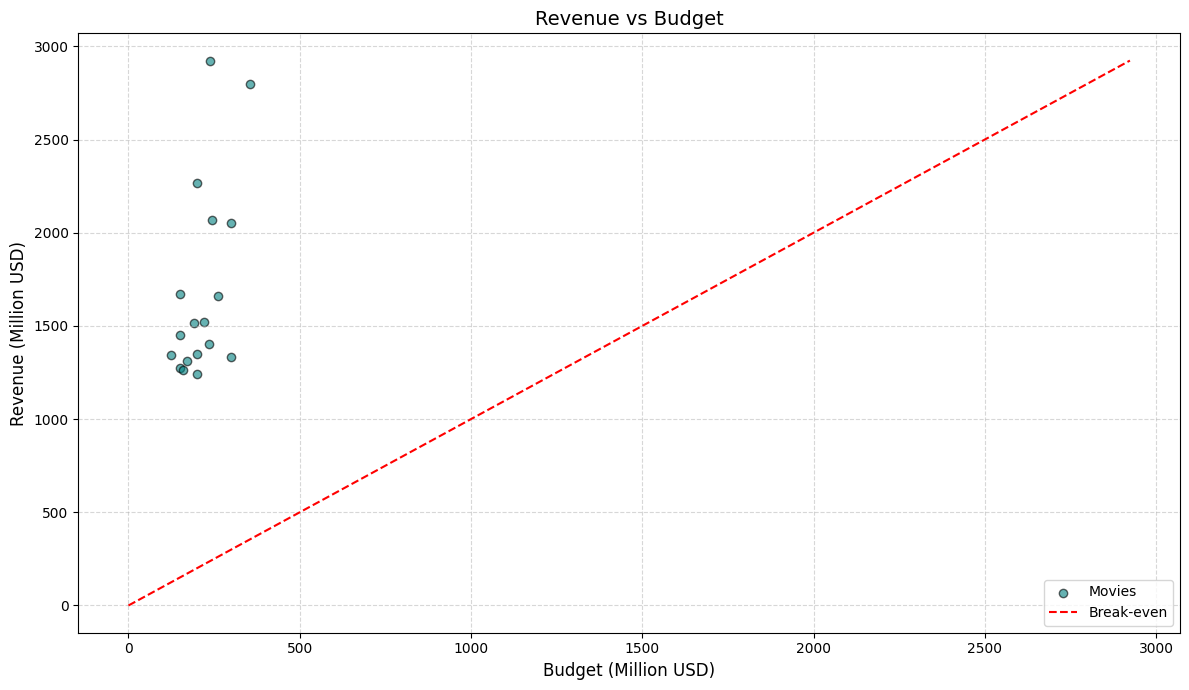

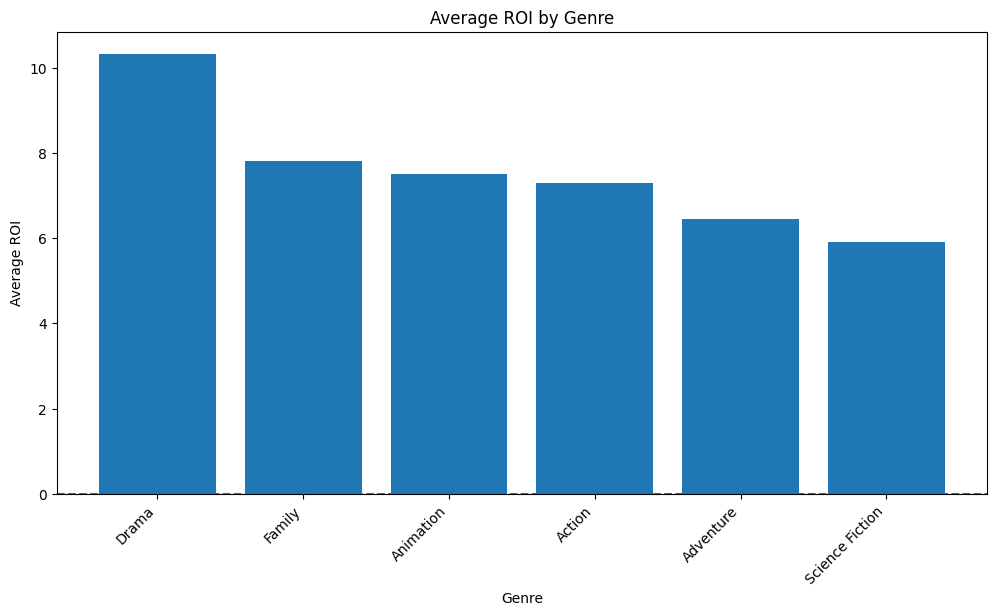

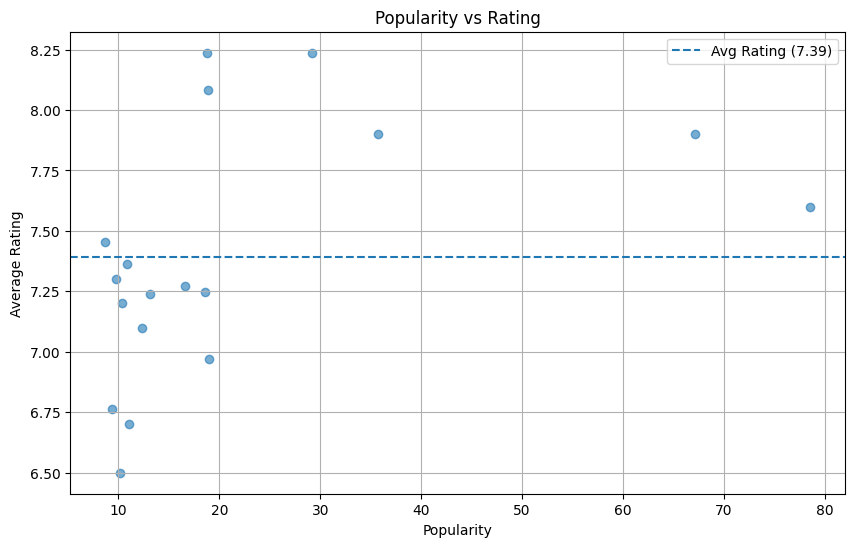

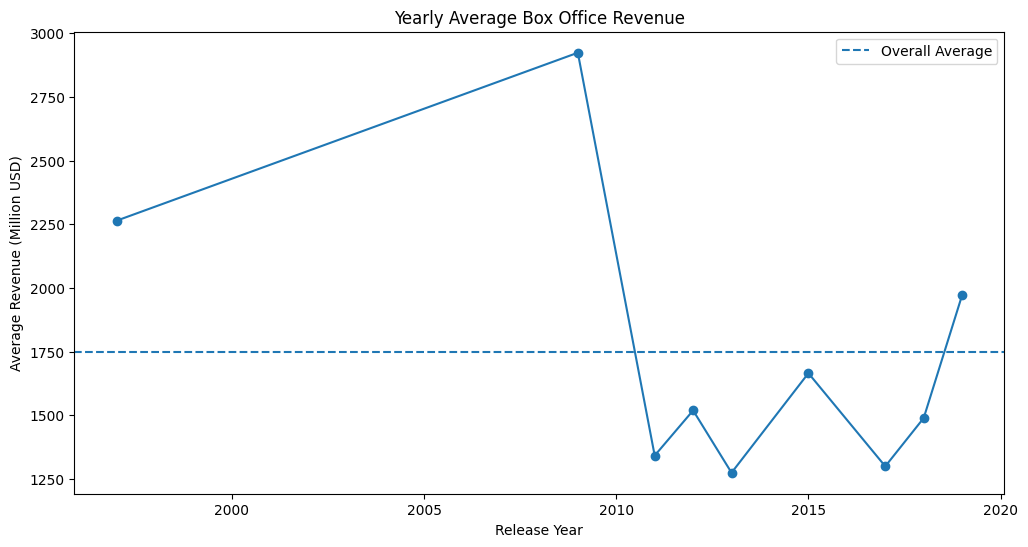

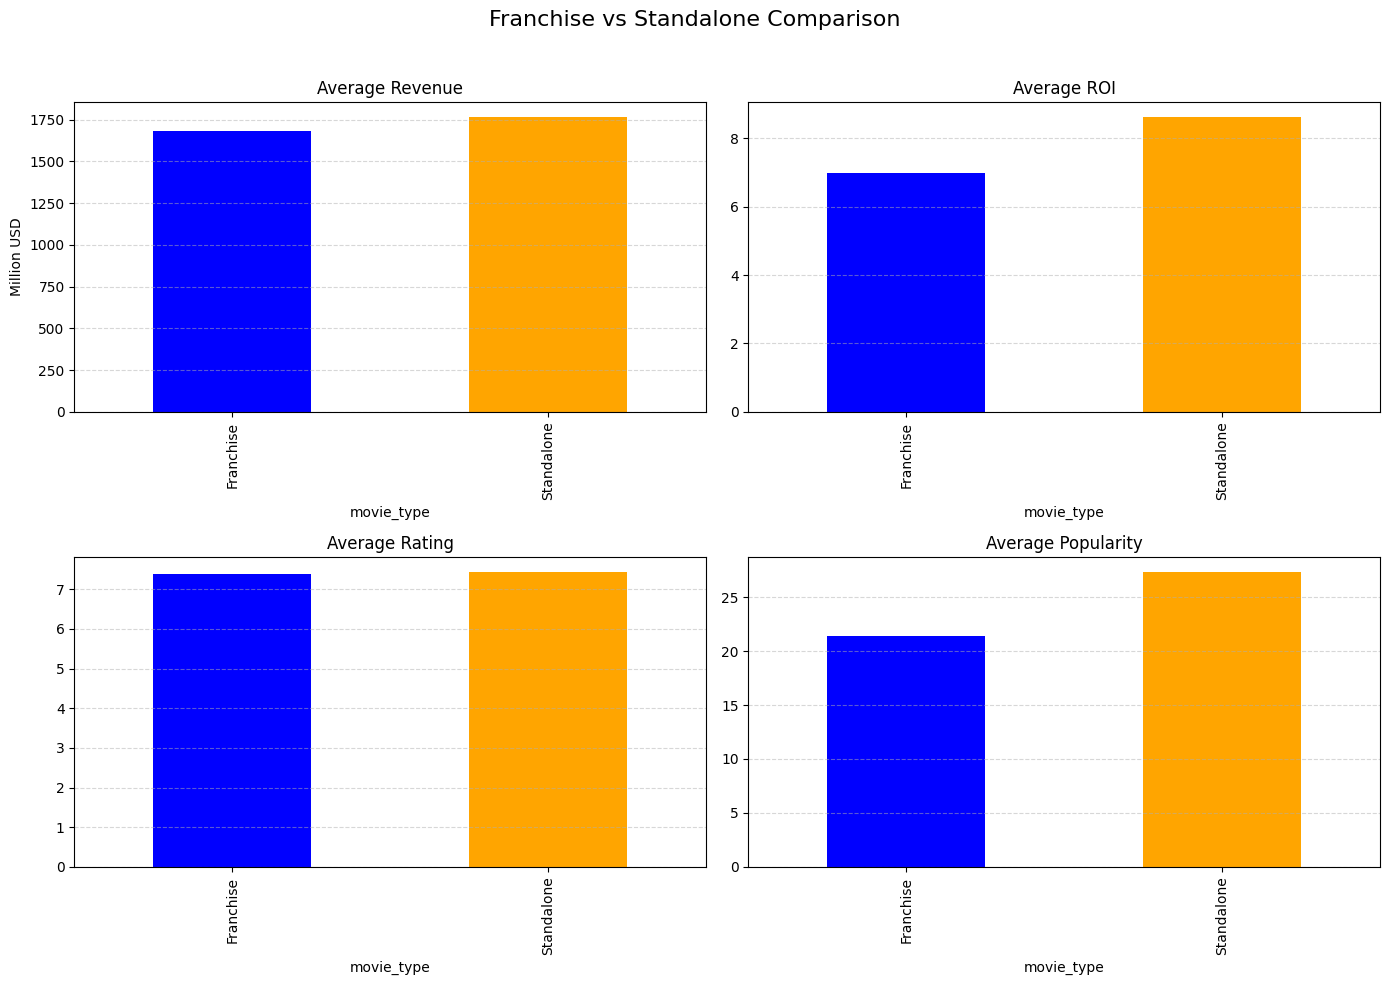

In [21]:
# 1️.Ensure transformed data is prepared
#from Visualization.visualize import prepare_analytics, run_all_visualizations

transformed_df = prepare_analytics(transformed_df)  # if not already done

# 2️.Run all visualizations
run_all_visualizations(transformed_df)



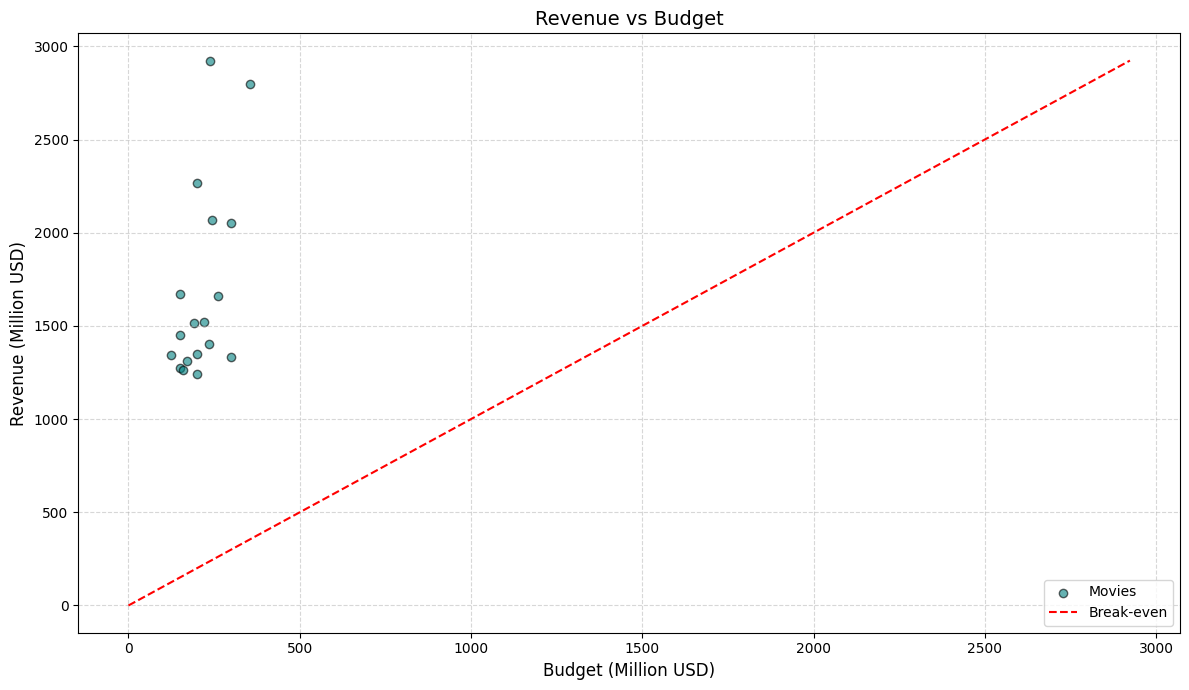

In [10]:
from Visualization.visualize import plot_revenue_vs_budget
plot_revenue_vs_budget(transformed_df)